<a href="https://colab.research.google.com/github/Osstrinha/Fisica-Computacional-2/blob/main/Lista_4_Fis_Comp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import sys
print(sys.version)

print("link para arquivo: https://colab.research.google.com/drive/1qKBsHcUW0WzkybFjm12zniB1sLHRchzM?usp=sharing")

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
link para arquivo: https://colab.research.google.com/drive/1qKBsHcUW0WzkybFjm12zniB1sLHRchzM?usp=sharing


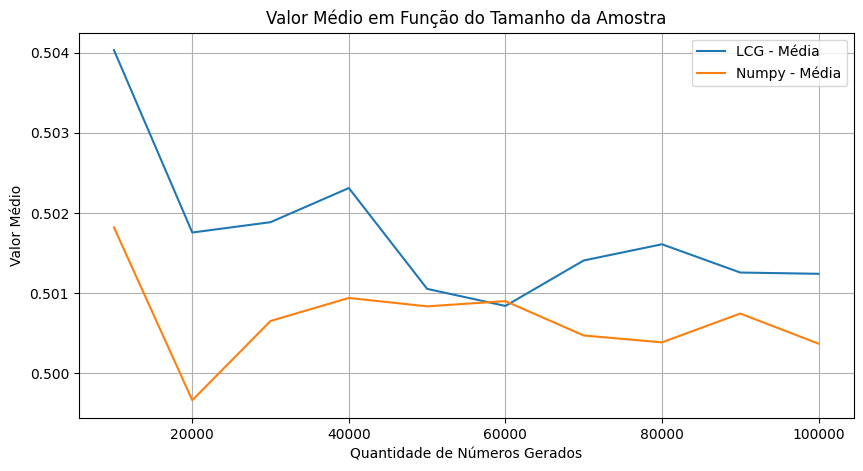

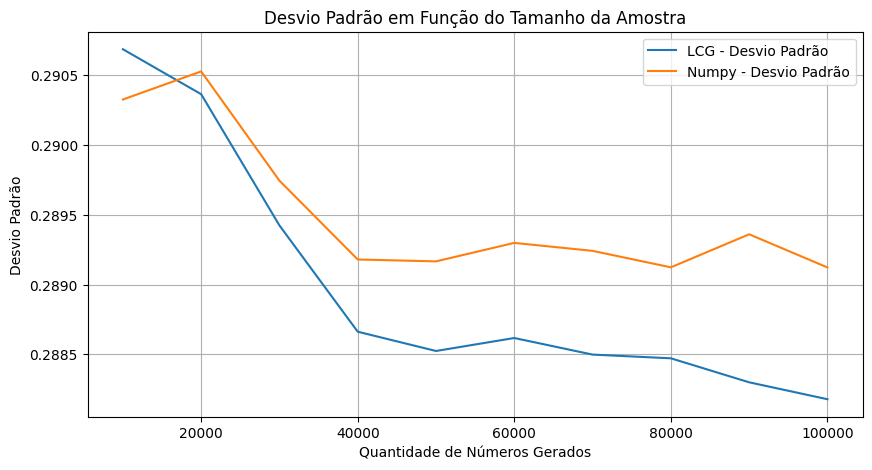

In [37]:
# Exercício 1 - Testando geradores de números aleatórios

import numpy as np
import matplotlib.pyplot as plt

# Função: Gerador congruencial linear
# Parâmetros fornecidos: a, c, m, seed
# Retorna uma lista de números aleatórios normalizados (0 a 1)
def linear_congruential_method(seed, a, c, m, N):
    sequence = []
    current = seed
    for _ in range(N):
        current = (a * current + c) % m  # Calcula o próximo valor usando congruência
        sequence.append(current / m)  # Normaliza o valor entre 0 e 1
    return sequence

# Configurações iniciais
seed = 42
a = 1664525
c = 1013904223
m = 2**32
N = 100000  # Quantidade de números gerados

# Gera sequências com o método congruencial linear
lcg_sequence = linear_congruential_method(seed, a, c, m, N)
np_sequence = np.random.uniform(0, 1, N)  # Gera números aleatórios com numpy

# Função: Calcula média e desvio padrão
# Retorna listas contendo valores para diferentes tamanhos de amostras
def analyze_sequence(sequence):
    means = []
    stds = []
    for i in range(10000, N+1, 10000):
        sample = sequence[:i]  # Amostra progressiva
        means.append(np.mean(sample))  # Média
        stds.append(np.std(sample))   # Desvio padrão
    return means, stds

# Análise das sequências
a_means, a_stds = analyze_sequence(lcg_sequence)
n_means, n_stds = analyze_sequence(np_sequence)

# Gráficos: Médias
plt.figure(figsize=(10, 5))
plt.plot(range(10000, N+1, 10000), a_means, label='LCG - Média')
plt.plot(range(10000, N+1, 10000), n_means, label='Numpy - Média')
plt.xlabel('Quantidade de Números Gerados')
plt.ylabel('Valor Médio')
plt.legend()
plt.title('Valor Médio em Função do Tamanho da Amostra')
plt.grid()
plt.show()

# Gráficos: Desvio padrão
plt.figure(figsize=(10, 5))
plt.plot(range(10000, N+1, 10000), a_stds, label='LCG - Desvio Padrão')
plt.plot(range(10000, N+1, 10000), n_stds, label='Numpy - Desvio Padrão')
plt.xlabel('Quantidade de Números Gerados')
plt.ylabel('Desvio Padrão')
plt.legend()
plt.title('Desvio Padrão em Função do Tamanho da Amostra')
plt.grid()
plt.show()


In [36]:
# Exercício 2 - Integração de Monte Carlo

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Função: Monte Carlo para integração
def monte_carlo_integration(func, a, b, N):
    x = np.random.uniform(a, b, N)  # Gera pontos aleatórios no intervalo [a, b]
    y = func(x)  # Avalia a função nos pontos gerados
    integral = (b - a) * np.mean(y)  # Aproximação pela média
    return integral


# Funções para integração
functions = [
    lambda x: x,
    lambda x: np.exp(-x),
    lambda x: np.sin(x),
    lambda x: x**2 + x**3
]

# Limites de integração
a_b = [(0, 1), (0, 1), (0, np.pi), (0, 1)]

# Número de pontos
N = 10**8

# Resultados das integrais
for i, func in enumerate(functions):
    a, b = a_b[i]
    mc_result = monte_carlo_integration(func, a, b, N)
    quad_result, _ = quad(func, a, b)
    print(f"Integral {i+1}: Monte Carlo = {mc_result:.6f}, Quad = {quad_result:.6f}")



# Por causa do extenso tempo de processamento, decidi deixar como opcional a implementação de um método Monte Carlo utilizando o método de geração de números aleatórios implementado anteriormente
"""


# Função: gerador de números aleatórios pelo método congruencial linear
def linear_congruential_method_vec(a, b, N, seed=42, alph=1664525, c=1013904223, m=2**32):
    # Inicializando a array
    sequence = np.empty(N, dtype=np.float64)
    sequence[0] = seed

    # geração vetorizada
    for i in range(1, N):
        sequence[i] = (alph * sequence[i-1] + c) % m

    # Atribuição no intevalo [a, b]
    sequence = (sequence / m) * (np.abs(b - a)) + a
    return sequence

# Função: Monte Carlo com implementação do método de números aleatórios
def monte_carlo_integrat_alt(func, a, b, N):
    x = linear_congruential_method_vec(a, b, N)  # Gera pontos aleatórios no intervalo [a, b]
    y = func(x)  # Avalia a função nos pontos gerados
    integral = (b - a) * np.mean(y)  # Aproximação pela média
    return integral

# Resultados das integrais
for i, func in enumerate(functions):
    a, b = a_b[i]
    mc_result = monte_carlo_integration(func, a, b, N)
    mc_result_alt = monte_carlo_integrat_alt(func, a, b, N)
    quad_result, _ = quad(func, a, b)
    print(f"Integral {i+1}: Monte Carlo = {mc_result:.6f}, Quad = {quad_result:.6f}, Monte Carlo alterado = {mc_result_alt:.6f}")

"""


# Volume do elipsoide
np.random.seed(42)
def volume_ellipsoid(a, b, c, N):
    x = np.random.uniform(-a, a, N)
    y = np.random.uniform(-b, b, N)
    z = np.random.uniform(-c, c, N)
    inside = (x**2 / a**2 + y**2 / b**2 + z**2 / c**2) <= 1
    return (8 * a * b * c) * np.sum(inside) / N

volume_mc = volume_ellipsoid(1, 2, 3, N)
volume_real = 4/3 * np.pi * 1 * 2 * 3
print(f"Volume do elipsoide: Monte Carlo = {volume_mc:.6f}, Real = {volume_real:.6f}")



Integral 1: Monte Carlo = 0.499980, Quad = 0.500000
Integral 2: Monte Carlo = 0.632122, Quad = 0.632121
Integral 3: Monte Carlo = 2.000195, Quad = 2.000000
Integral 4: Monte Carlo = 0.583286, Quad = 0.583333
Volume do elipsoide: Monte Carlo = 25.135667, Real = 25.132741


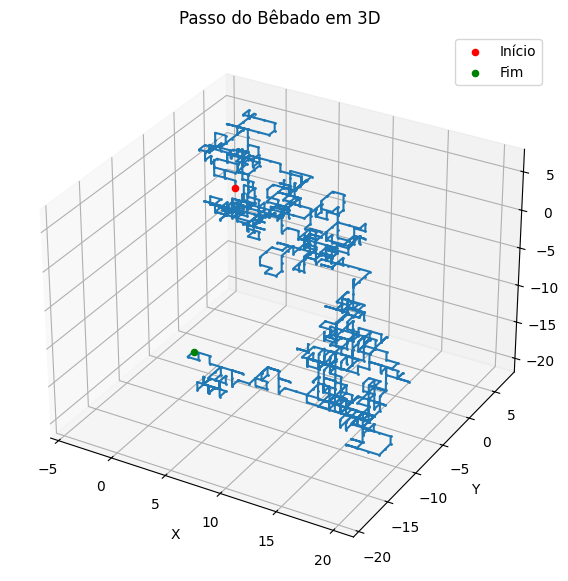

Deslocamento Máximo: [20 19 20]
Deslocamento Médio: [ 8.99300699 -4.86313686 -6.48151848]


In [39]:
# Exercício 3 - Passo do bêbado em 3D

import numpy as np
import matplotlib.pyplot as plt


# Função para simular o passo do bêbado em 3D
def random_walk_3d(steps, seed=42):
    np.random.seed(seed)
    position = np.array([0, 0, 0])
    positions = [position.copy()]
    for _ in range(steps):
        axis = np.random.choice([0, 1, 2])  # Escolhe o eixo: x, y ou z
        direction = np.random.choice([-1, 1])  # Escolhe a direção: -1 ou 1
        position[axis] += direction
        positions.append(position.copy())
    return np.array(positions)

# Parâmetros
steps = 1000
positions = random_walk_3d(steps)

# Gráfico: Caminhada em 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], marker='o', markersize=1)
ax.scatter(positions[0, 0], positions[0, 1], positions[0, 2], color='red', label='Início')
ax.scatter(positions[-1, 0], positions[-1, 1], positions[-1, 2], color='green', label='Fim')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Passo do Bêbado em 3D')
ax.legend()
plt.show()

# Resultados: Deslocamentos
max_displacement = np.max(np.abs(positions), axis=0)
mean_displacement = np.mean(positions, axis=0)
print(f"Deslocamento Máximo: {max_displacement}")
print(f"Deslocamento Médio: {mean_displacement}")


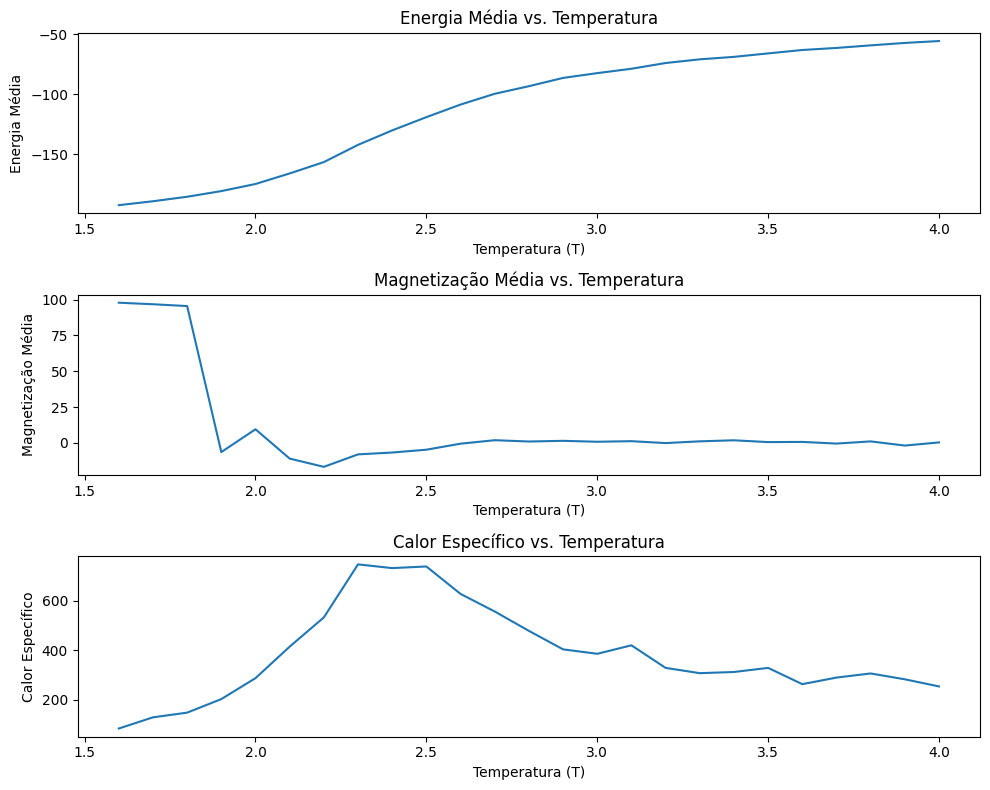


Temperatura crítica aproximada: 2.3


In [34]:
# Exercício 4 - Modelo de Ising 2D

import numpy as np
import matplotlib.pyplot as plt
from numba import jit

L = 10  # Tamanho da rede
J = 1   # Constante de acoplamento
B = 0.1 # Campo magnético externo
N_steps = 100000 # Número de passos de Monte Carlo
T_range = np.arange(1.6, 4.1, 0.1) # Intervalo de temperaturas

@jit(nopython=True)
def initialize_lattice(L):
    # Inicializa a rede com spins aleatórios (+1 ou -1)
    return np.random.choice(np.array([-1, 1]), size=(L, L))

@jit(nopython=True)
def energy(lattice, L):
    # Calcula a energia da rede
    E = 0
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
            E -= J * S * neighbors
    return E / 2  # Divide por 2 para evitar dupla contagem

@jit(nopython=True)
def magnetization(lattice):
    # Calcula a magnetização da rede
    return np.sum(lattice)

@jit(nopython=True)
def metropolis_step(lattice, L, T):
    # Realiza um passo de Metropolis
    for _ in range(L**2):
        i, j = np.random.randint(0, L, 2)  # Escolhe um sítio aleatório
        S = lattice[i, j]
        neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
        dE = 2 * J * S * neighbors  # Calcula a variação de energia
        if dE < 0 or np.random.rand() < np.exp(-dE / T):  # Aceita a mudança se dE < 0 ou com probabilidade exp(-dE/T)
            lattice[i, j] *= -1  # Inverte o spin

# Simulação para cada temperatura
data = []
for T in T_range:
    lattice = initialize_lattice(L)
    E_list = []
    M_list = []
    for _ in range(N_steps):
        metropolis_step(lattice, L, T)
        if _ % 100 == 0:  # Coleta dados a cada 100 passos
            E_list.append(energy(lattice, L))
            M_list.append(magnetization(lattice))
    data.append([T, np.mean(E_list), np.mean(M_list), np.var(E_list)])  # Armazena temperatura, energia média, magnetização média e variância da energia

# Separa os dados para plotagem
temperatures, energies, magnetizations, specific_heats = zip(*data)

# Plotagem dos resultados
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(temperatures, energies)
plt.xlabel('Temperatura (T)')
plt.ylabel('Energia Média')
plt.title('Energia Média vs. Temperatura')

plt.subplot(3, 1, 2)
plt.plot(temperatures, magnetizations)
plt.xlabel('Temperatura (T)')
plt.ylabel('Magnetização Média')
plt.title('Magnetização Média vs. Temperatura')

plt.subplot(3, 1, 3)
plt.plot(temperatures, specific_heats)
plt.xlabel('Temperatura (T)')
plt.ylabel('Calor Específico')
plt.title('Calor Específico vs. Temperatura')

plt.tight_layout()
plt.show()

# Determinação da temperatura crítica
# A temperatura crítica pode ser estimada visualmente como o ponto onde o calor específico é máximo
# ou onde a magnetização cai abruptamente para zero.

"""
# Imprime os dados para inspeção visual
for T, E, M, C in data:
    print(f"T={T:.1f}, Energia={E:.4f}, Magnetização={M:.4f}, Calor Específico={C:.4f}")
"""

# Encontra o índice do valor máximo de calor específico
max_index = specific_heats.index(max(specific_heats))

# Obtém a temperatura correspondente
critical_temperature = temperatures[max_index]

print(f"\nTemperatura crítica aproximada: {critical_temperature:.1f}")  # Valor aproximado baseado na inspeção visual dos dados